### 特征统计分析

In [1]:
%matplotlib inline
import os
import glob
import xgboost
import operator
import numpy as np
from pylab import *
import pandas as pd
import seaborn as sns
import SimpleITK as sitk
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression,Lasso,LassoCV, LassoLarsCV, LassoLarsIC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import cohen_kappa_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel,RFECV
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, AdaBoostClassifier,VotingClassifier
from sklearn.model_selection import GridSearchCV,KFold, cross_val_predict,StratifiedKFold,train_test_split,cross_val_score,LeaveOneOut
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,plot_confusion_matrix,auc,roc_auc_score,roc_curve,plot_roc_curve,ConfusionMatrixDisplay,mean_squared_error
from imblearn.over_sampling import SMOTE,ADASYN
from imblearn.combine import SMOTETomek,SMOTEENN
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from sklearn.impute import SimpleImputer
import missingno as msno
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings(action='ignore')

### 导入数据

In [2]:
df = pd.read_csv('./Selected_features.csv')
scaler = StandardScaler()
#scaler = MinMaxScaler()
df_scaler = scaler.fit_transform(df[df.columns[3:]])
df_scaler=pd.concat([df[df.columns[2:3]], pd.DataFrame(df_scaler,columns=df.columns[3:])], axis=1)#拼接列表
df_scaler

,label,log-sigma-1-0-mm-3D_firstorder_Kurtosis,log-sigma-1-0-mm-3D_firstorder_Maximum,log-sigma-1-0-mm-3D_firstorder_Range,log-sigma-1-0-mm-3D_glcm_ClusterProminence,log-sigma-1-0-mm-3D_glcm_ClusterShade,log-sigma-1-0-mm-3D_glcm_Contrast,log-sigma-1-0-mm-3D_glcm_Imc2,log-sigma-1-0-mm-3D_glcm_InverseVariance,log-sigma-1-0-mm-3D_glcm_JointEnergy,...,wavelet-LLH_glcm_JointEntropy,wavelet-LLH_gldm_DependenceVariance,wavelet-LLH_gldm_LargeDependenceHighGrayLevelEmphasis,wavelet-LLH_glszm_LargeAreaLowGrayLevelEmphasis,wavelet-LLH_glszm_SizeZoneNonUniformity,wavelet-LLH_glszm_ZoneEntropy,wavelet-LLL_firstorder_10Percentile,wavelet-LLL_firstorder_Skewness,wavelet-LLL_glcm_Contrast,wavelet-LLL_glszm_LargeAreaHighGrayLevelEmphasis
0,0,-1.057644,1.304310,1.294132,0.539184,-0.517136,1.368657,1.331600,-1.447375,-0.750950,...,1.728019,-1.128361,-0.285638,-0.254165,0.558396,0.475202,0.715983,0.587248,1.833839,-0.254879
1,0,-0.695227,-0.082132,-0.972820,-0.262697,0.022391,-0.166052,0.358728,0.674163,-0.212717,...,0.626275,-1.204194,-1.076038,-0.253756,-0.498693,-0.251789,0.413801,-0.353718,-0.094707,-0.312543
2,0,-0.320394,0.316536,0.044939,-0.142027,-0.102644,0.176633,0.810958,-0.087165,-0.568222,...,1.130960,-1.340589,-0.782886,-0.254041,-0.461050,0.693503,0.519647,0.492343,0.036928,-0.279180
3,0,-0.757438,-0.561287,-0.343462,-0.239232,-0.008576,-0.097173,-0.275300,0.030515,-0.472056,...,-0.021625,-0.632203,-0.986022,-0.246417,-0.595248,-0.369060,0.422220,0.589519,-0.080179,-0.305413
4,0,-0.776240,0.243202,-0.107053,-0.216936,0.033340,0.926195,0.347091,-1.186454,-0.621959,...,0.361993,-0.475139,-1.121126,-0.249827,-0.419040,0.023555,0.421921,-0.147940,0.199533,-0.308286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,1,0.692589,-0.419183,-0.170454,-0.257012,0.000136,-0.603568,-0.625529,0.637697,0.174043,...,-1.313364,1.516101,-0.879863,1.436399,-0.715953,-0.651740,0.564875,0.511491,-0.347997,-0.006006
611,1,0.701817,-0.885805,-1.106730,-0.269567,0.014900,-0.673631,-1.763570,0.083698,1.000120,...,-2.365470,2.423188,-1.087045,3.046427,-0.741115,-1.655283,0.939805,-0.298825,-0.599226,0.052592
612,1,1.167100,-0.528478,-0.865579,-0.264790,0.037829,-0.664087,-0.988889,-0.169873,0.884123,...,-1.703464,1.711788,-0.841686,1.700201,-0.721944,-1.655283,0.337193,1.383877,-0.553788,0.051929
613,1,1.261446,-0.759299,-0.224701,-0.247737,-0.022285,-0.568971,-0.061565,1.139286,0.036238,...,-1.487815,0.635713,-0.886424,0.827900,-0.741115,-2.414164,0.700991,0.868008,-0.344002,-0.236770


### 绘制箱形图

In [4]:
plt.figure(figsize=(6,5))
sns.boxplot(x='label',y='log-sigma-1-0-mm-3D_firstorder_Kurtosis',hue='stage',data=df_scaler,width=0.5,orient='v')
#plt.ylabel('Nuclear grade', fontsize=12)
plt.xlabel('Nuclear grade', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

ValueError: Could not interpret input 'stage'

<Figure size 432x360 with 0 Axes>

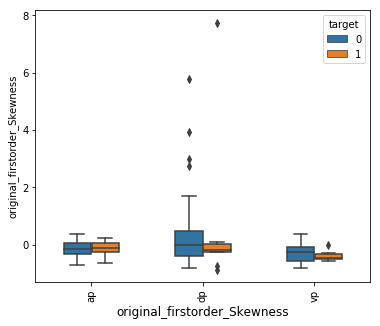

In [9]:
plt.figure(figsize=(6,5))
sns.boxplot(x='stage',y='original_firstorder_Skewness',hue='target',data=df_scaler,width=0.5,orient='v')
#plt.ylabel('Nuclear grade', fontsize=12)
plt.xlabel('original_firstorder_Skewness', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

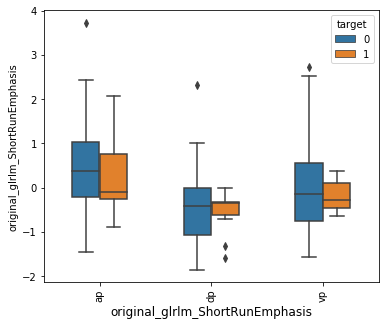

In [7]:
plt.figure(figsize=(6,5))
sns.boxplot(x='stage',y='original_glrlm_ShortRunEmphasis',hue='target',data=df_scaler,width=0.5,orient='v')
#plt.ylabel('Nuclear grade', fontsize=12)
plt.xlabel('original_glrlm_ShortRunEmphasis', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

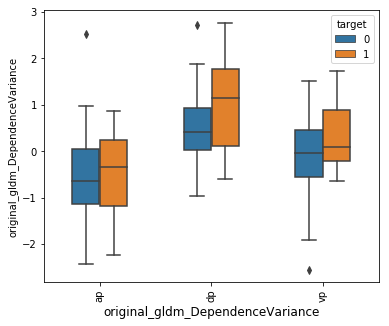

In [10]:
plt.figure(figsize=(6,5))
sns.boxplot(x='stage',y='original_gldm_DependenceVariance',hue='target',data=df_scaler,width=0.5,orient='v')
#plt.ylabel('Nuclear grade', fontsize=12)
plt.xlabel('original_gldm_DependenceVariance', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

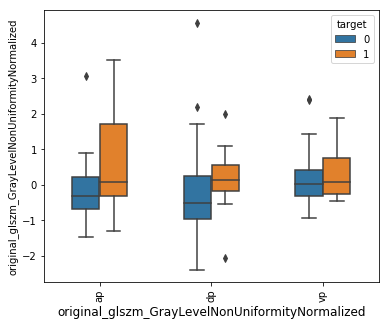

In [11]:
plt.figure(figsize=(6,5))
sns.boxplot(x='stage',y='original_glszm_GrayLevelNonUniformityNormalized',hue='target',data=df_scaler,width=0.5,orient='v')
#plt.ylabel('Nuclear grade', fontsize=12)
plt.xlabel('original_glszm_GrayLevelNonUniformityNormalized', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

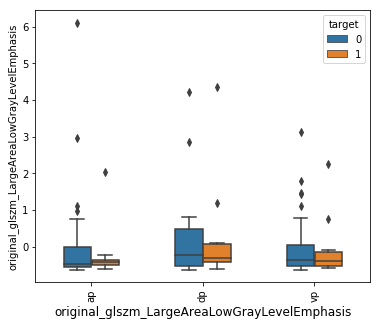

In [12]:
plt.figure(figsize=(6,5))
sns.boxplot(x='stage',y='original_glszm_LargeAreaLowGrayLevelEmphasis',hue='target',data=df_scaler,width=0.5,orient='v')
#plt.ylabel('Nuclear grade', fontsize=12)
plt.xlabel('original_glszm_LargeAreaLowGrayLevelEmphasis', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
for i in range(4,104,1):
    plt.figure(figsize=(6,5))
    sns.boxplot(x='stage',y=df.columns[i:i+1][0],hue='target',data=df_scaler,width=0.5,orient='v')
    #plt.ylabel('Nuclear grade', fontsize=12)
    #plt.xlabel('Feature', fontsize=12)
    plt.xticks(rotation='vertical')
    plt.show()

### ap特征分析

In [5]:
target=df[df.columns[2:3]]
features=df[df.columns[3:]]

In [24]:
#用selectbest对特征做方差分析F检验
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_classif
model = SelectKBest(f_classif, k=2)
select_feature=model.fit_transform(features, target)
scores=model.pvalues_
indices=np.argsort(scores)[::-1]
new_scores, new_feats = [], []
print('Features ANOVA p_value')
for i in range(len(scores)):
    print("%0.2f %s" % (scores[indices[i]], features.columns[indices[i]]))
    new_scores.append(scores[indices[i]])
    new_feats.append(features.columns[indices[i]])

d = {'features': new_feats, 'p value': new_scores}
p_df = pd.DataFrame(d)
display(p_df)
p_df.to_csv("./P_value.csv", index=False)

Features ANOVA p_value
0.99 wavelet-HLH_glcm_ClusterShade
0.99 wavelet-HHL_glcm_Autocorrelation
0.97 wavelet-LLH_glcm_ClusterShade
0.96 original_gldm_LowGrayLevelEmphasis
0.94 wavelet-HHL_gldm_SmallDependenceLowGrayLevelEmphasis
0.91 log-sigma-3-0-mm-3D_glszm_LargeAreaHighGrayLevelEmphasis
0.91 wavelet-HHL_glszm_SmallAreaEmphasis
0.90 log-sigma-2-0-mm-3D_glszm_GrayLevelVariance
0.89 log-sigma-3-0-mm-3D_glcm_Contrast
0.88 wavelet-HLH_glrlm_RunVariance
0.87 wavelet-HHL_glszm_GrayLevelNonUniformity
0.86 wavelet-HHL_firstorder_Kurtosis
0.85 wavelet-LHH_gldm_DependenceVariance
0.85 wavelet-LHL_firstorder_Kurtosis
0.84 wavelet-LHL_firstorder_Skewness
0.83 wavelet-HLH_glszm_ZoneVariance
0.80 log-sigma-4-0-mm-3D_gldm_SmallDependenceEmphasis
0.80 original_shape_Sphericity
0.74 log-sigma-3-0-mm-3D_firstorder_Kurtosis
0.73 wavelet-HLL_firstorder_Kurtosis
0.71 log-sigma-2-0-mm-3D_glcm_ClusterProminence
0.70 log-sigma-4-0-mm-3D_firstorder_Kurtosis
0.64 log-sigma-4-0-mm-3D_glcm_InverseVariance
0.63 

,features,p value
0,wavelet-HLH_glcm_ClusterShade,9.947168e-01
1,wavelet-HHL_glcm_Autocorrelation,9.930868e-01
2,wavelet-LLH_glcm_ClusterShade,9.650554e-01
3,original_gldm_LowGrayLevelEmphasis,9.618269e-01
4,wavelet-HHL_gldm_SmallDependenceLowGrayLevelEm...,9.358959e-01
...,...,...
149,wavelet-HLL_glszm_SmallAreaEmphasis,6.671605e-12
150,wavelet-HLL_glcm_JointAverage,1.437868e-12
151,wavelet-LHL_firstorder_InterquartileRange,1.366437e-15
152,original_shape_Maximum2DDiameterColumn,7.148129e-19


In [8]:
#标准差
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
            % (mean, std * 2, params))

AttributeError: 'function' object has no attribute 'cv_results_'

In [ ]:
#计算MCC系数
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_true, y_pred)